In [473]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns

sns.set_style('whitegrid')

In [474]:
df = pd.read_csv('Full Dataset.csv',index_col=0)
df_copy = df.copy()

<AxesSubplot:xlabel='MVP_Share_scaled', ylabel='Player'>

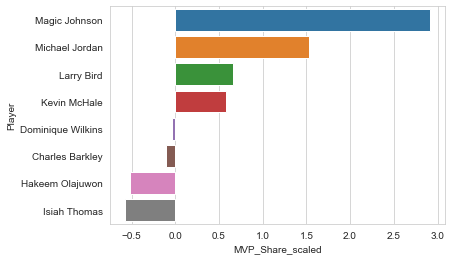

In [501]:
df = df_copy.copy()

# df.sort_values('MVP_Share',ascending=False)
year = 1987
# sns.barplot(x='MVP_Share',y='Player',data=df.sort_values('MVP_Share',ascending=False)[:10],ci=False)

df = df[(df['MVP_Share'] != 0) & (df['Year_x'] == year)]

std = StandardScaler()
mvp_share_scaled = std.fit_transform(df[['MVP_Share']])

df['MVP_Share_scaled'] = mvp_share_scaled
sns.barplot(x='MVP_Share_scaled',y='Player',label='Year_x',data=df.sort_values('MVP_Share',ascending=False).head(8),ci=False)


# df.sort_values('MVP_Share_scaled',ascending=False)
# plt.xlim((0.95,1))

In [502]:
df = df_copy.copy()

df.loc[(df['MVP_Share'] != 0),['MVP_Votes_Bool']] = 1

df.loc[df['MVP_Votes_Bool'] != 1,['MVP_Votes_Bool']] = 0
df.MVP_Votes_Bool = pd.Categorical(df.loc[:,'MVP_Votes_Bool'])


df.MVP_Votes_Bool.value_counts()

0.0    17594
1.0      670
Name: MVP_Votes_Bool, dtype: int64

In [503]:
reg_feat_list = ['VORP','WS','BPM','PTS','PER','TOV','FT']
clf_feat_list = ['Pos', 'Age', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']


In [504]:

# year = 2016


train_data  = df[(df['Year_x'] != year)].copy()

X_train_clf = train_data.loc[:,clf_feat_list]
X_train_reg = train_data.loc[train_data['MVP_Votes_Bool'] == 1,clf_feat_list]
y_train_clf = train_data.MVP_Votes_Bool
y_train_reg = train_data.loc[train_data['MVP_Votes_Bool'] == 1,['MVP_Share']]

X_train_reg

,Pos,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,5,32,82,38.3,10.2,16.9,0.604,0.0,0.0,0.000,...,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3
3,1,31,80,35.8,4.8,9.9,0.482,0.1,0.2,0.222,...,19.7,17.0,5.9,2.9,8.9,0.148,1.4,-0.3,1.1,2.3
17,4,23,82,36.0,8.5,17.8,0.474,0.7,1.7,0.406,...,14.0,25.3,5.6,5.6,11.2,0.182,3.0,1.5,4.5,4.8
84,3,29,78,36.1,10.7,20.7,0.519,0.1,0.3,0.200,...,13.3,30.3,7.3,5.2,12.5,0.213,5.7,1.9,7.6,6.8
97,2,27,78,37.6,13.1,24.9,0.528,0.4,1.3,0.314,...,10.3,31.7,9.3,1.3,10.6,0.173,5.5,-1.6,3.9,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17932,4,37,56,37.2,11.4,21.8,0.524,2.9,8.0,0.359,...,12.5,32.3,5.2,2.3,7.5,0.172,6.9,0.8,7.7,5.1
17948,5,26,74,33.5,10.3,17.7,0.583,1.3,3.9,0.337,...,15.6,31.9,10.8,4.5,15.2,0.296,9.2,4.5,13.7,9.8
18048,1,22,57,33.1,10.2,20.6,0.493,1.5,4.5,0.344,...,12.6,33.7,4.6,2.1,6.7,0.171,6.2,-0.1,6.1,3.9
18096,1,36,65,32.9,5.6,11.3,0.493,1.0,3.1,0.317,...,15.6,19.7,5.8,3.6,9.4,0.210,3.1,2.3,5.4,4.0


In [505]:
from sklearn.model_selection import train_test_split


test_data  = df[(df['Year_x'] == year)].copy()

X_test_clf = test_data.loc[:,clf_feat_list]
X_test_reg = test_data.loc[test_data['MVP_Votes_Bool'] == 1,reg_feat_list]
y_test_clf = test_data.MVP_Votes_Bool
y_test_reg = test_data.MVP_Share

X_test_reg

,VORP,WS,BPM,PTS,PER,TOV,FT
2169,3.4,8.9,3.1,25.7,22.1,2.7,5.4
2179,6.0,12.0,6.7,23.0,25.1,4.7,6.3
2186,8.6,15.2,9.4,28.1,26.4,3.2,5.6
2189,2.1,8.0,1.0,21.0,18.1,2.2,5.2
2247,3.1,8.1,1.9,28.6,20.5,2.6,5.0
2296,8.0,15.9,8.8,23.9,27.0,3.8,6.7
2304,10.6,16.9,10.8,37.1,29.8,3.3,10.2
2319,5.4,9.7,5.0,18.9,20.8,2.0,3.0
2329,1.7,6.9,0.3,21.7,18.0,2.9,3.9
2330,3.0,9.4,2.8,24.1,23.8,2.8,7.8


RandomForestClassifier() Accuracy: 98.2%


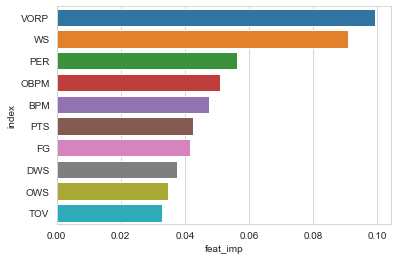

DecisionTreeClassifier() Accuracy: 95.21%


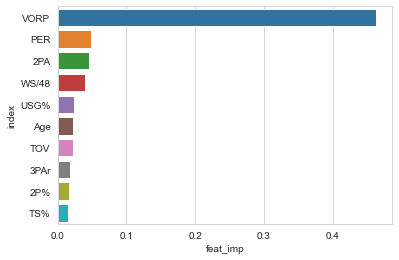

In [506]:

for clf in [RandomForestClassifier(),DecisionTreeClassifier(),]:
    clf.fit(X_train_clf,y_train_clf)
    # feature_importance = clf.feature_importances_

    print(f'{clf} Accuracy: {round(clf.score(X_test_clf,y_test_clf)*100,2)}%')

    feature_importances = pd.Series(clf.feature_importances_, index=X_train_clf.columns).reset_index()

    # feature_importances = feature_importances.reset_index()
    feature_importances.columns = ['index','feat_imp']

    sns.barplot(x='feat_imp',y='index',data=feature_importances.nlargest(10,columns=['feat_imp']).sort_values(ascending=False,by='feat_imp'))
    plt.show()

In [507]:
clf = RandomForestClassifier()
clf.fit(X_train_clf[clf_feat_list],y_train_clf)


RandomForestClassifier()

In [508]:
pred = clf.predict(X_test_clf[clf_feat_list])
clf.score(X_test_clf[clf_feat_list],y_test_clf)

X_test_clf['pred'] = pred

X_test_got_votes = X_test_clf[X_test_clf['pred'] == 1]

X_test_got_votes

,Pos,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pred
2169,3,27,80,33.3,9.8,19.9,0.495,0.7,1.9,0.353,...,31.3,6.8,2.1,8.9,0.160,4.1,-1.1,3.1,3.4,1.0
2179,4,23,68,40.3,8.2,13.8,0.594,0.3,1.5,0.202,...,23.1,7.7,4.3,12.0,0.210,5.4,1.3,6.7,6.0,1.0
2186,3,30,74,40.6,10.6,20.2,0.525,1.2,3.0,0.400,...,27.5,10.4,4.8,15.2,0.243,7.3,2.0,9.4,8.6,1.0
2236,2,24,82,38.0,8.6,17.2,0.502,0.1,0.6,0.234,...,23.6,6.6,3.7,10.3,0.158,3.5,1.4,4.9,5.4,1.0
2247,3,33,82,37.6,11.8,23.4,0.503,0.0,0.2,0.267,...,29.2,7.0,1.1,8.1,0.126,4.0,-2.0,1.9,3.1,1.0
2254,1,26,82,37.4,6.1,12.6,0.488,0.9,2.3,0.384,...,20.3,8.3,1.7,10.0,0.157,4.4,-0.1,4.3,4.9,1.0
2296,1,27,80,36.3,8.5,16.4,0.522,0.1,0.5,0.205,...,26.3,12.1,3.8,15.9,0.263,7.5,1.3,8.8,8.0,1.0
2304,2,23,82,40.0,13.4,27.8,0.482,0.1,0.8,0.182,...,38.3,11.9,5.0,16.9,0.247,8.4,2.4,10.8,10.6,1.0
2330,5,31,73,34.1,8.2,18.0,0.454,0.0,0.2,0.000,...,29.3,6.0,3.4,9.4,0.182,4.3,-1.5,2.8,3.0,1.0
2344,4,29,77,39.7,10.3,17.0,0.604,0.0,0.1,0.000,...,24.1,10.8,4.0,14.8,0.232,4.7,0.4,5.1,5.5,1.0


In [509]:
reg = RandomForestRegressor()
reg.fit(X_train_reg,y_train_reg)

/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_20952/4155944798.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train_reg,y_train_reg)


RandomForestRegressor()

In [510]:
# # rf.feature_importances_
#
# # rf.fit(X_train_clf,y_train_clf)
# # feature_importance = clf.feature_importances_
#
# # print(f'{clf} Accuracy: {round(clf.score(X_test_clf,y_test_clf)*100,2)}%')
#
# feature_importances = pd.Series(rf.feature_importances_, index=X_feat_imp.columns).reset_index()
#
# # feature_importances = feature_importances.reset_index()
# feature_importances.columns = ['index','feat_imp']
#
# sns.barplot(x='feat_imp',y='index',data=feature_importances.nlargest(15,columns=['feat_imp']).sort_values(ascending=False,by='feat_imp'))
# plt.show()

In [511]:
reg_feature_list = ['WS','VORP','PER','BPM','USG%','TOV','PTS','FTr','PF']

In [512]:

# X_reg_train = df.loc[(df['MVP_Share'] != 0) & (df.Year_x != year),reg_feature_list]
X_reg_train = df.loc[(df['MVP_Share'] != 0) & (df.Year_x != year),reg_feature_list]
y_reg_train = df.loc[(df['MVP_Share'] != 0) & (df.Year_x != year),'MVP_Share']

# X_reg_test = df.loc[(df['MVP_Share'] != 0) & (df.Year_x == year),reg_feature_list]
X_reg_test = X_test_got_votes.loc[:,reg_feature_list]
# y_reg_test = df.loc[(df['MVP_Share'] != 0) & (df.Year_x == year),'MVP_Share']

In [513]:
rf = RandomForestRegressor()
rf.fit(X_reg_train,y_reg_train)

RandomForestRegressor()

In [514]:
# rf.score(X_reg_test,y_reg_test)

In [515]:
rf.predict(X_reg_test)

array([0.04759, 0.29116, 0.74581, 0.0591 , 0.03117, 0.07141, 0.59776,
       0.63651, 0.08502, 0.22631, 0.13165, 0.00702, 0.3337 ])

In [516]:
pred = pd.DataFrame(rf.predict(X_reg_test),columns=['Predicted_y'])

results = pd.DataFrame(np.column_stack((df.loc[X_reg_test.index,['Player','Year_x']],pred,)),columns=['Player','Year','Pred_MVP',])

results.Pred_MVP = results.Pred_MVP*100

In [517]:
results

,Player,Year,Pred_MVP
0,Mark Aguirre,1987,4.759
1,Charles Barkley,1987,29.116
2,Larry Bird,1987,74.581
3,Clyde Drexler,1987,5.91
4,Alex English,1987,3.117
5,Sleepy Floyd,1987,7.141
6,Magic Johnson,1987,59.776
7,Michael Jordan,1987,63.651
8,Moses Malone,1987,8.502
9,Kevin McHale,1987,22.631


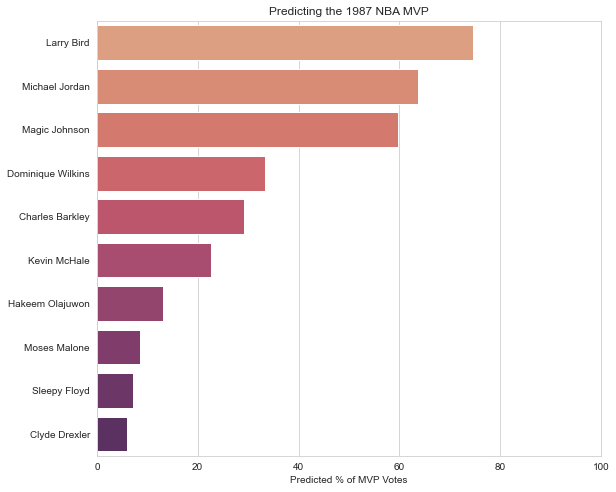

In [518]:



sns.set_style('whitegrid')
plt.figure(figsize=(10,8),)
# sns.barplot(x='Pred_MVP',y='Player',data=results.sort_values('Pred_MVP',ascending=False).head(10),ci=False,palette=sns.color_palette("flare",10))
sns.barplot(x='Pred_MVP',y='Player',data=results.sort_values('Pred_MVP',ascending=False).head(10),ci=False,palette=sns.color_palette("flare",10))
plt.ylabel('')
plt.xlabel('Predicted % of MVP Votes')
plt.title(f'Predicting the {year} NBA MVP')

sns.color_palette("rocket", as_cmap=True)
plt.xlim(left=0,right=100)
plt.subplots_adjust(left=0.2, )

plt.savefig(f'/Users/chaseallbright/Downloads/{year}_predicted_MVP_RandomForest.png',dpi=400)

# results

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DBPM,BPM,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share,MVP_Votes_Bool
2169,Mark Aguirre,3,27,DAL,80,80,33.3,9.8,19.9,0.495,...,-1.1,3.1,3.4,1987,15.0,0.0,1.0,780.0,0.1,1.0
2179,Charles Barkley,4,23,PHI,68,62,40.3,8.2,13.8,0.594,...,1.3,6.7,6.0,1987,6.0,1.0,113.0,780.0,14.5,1.0
2186,Larry Bird,3,30,BOS,74,73,40.6,10.6,20.2,0.525,...,2.0,9.4,8.6,1987,3.0,1.0,271.0,780.0,34.7,1.0
2189,Rolando Blackman,2,27,DAL,80,80,34.5,7.8,15.8,0.495,...,-1.1,1.0,2.1,1987,15.0,0.0,1.0,780.0,0.1,1.0
2247,Alex English,3,33,DEN,82,82,37.6,11.8,23.4,0.503,...,-2.0,1.9,3.1,1987,14.0,0.0,2.0,780.0,0.3,1.0
2296,Magic Johnson,1,27,LAL,80,80,36.3,8.5,16.4,0.522,...,1.3,8.8,8.0,1987,1.0,65.0,733.0,780.0,94.0,1.0
2304,Michael Jordan,2,23,CHI,82,82,40.0,13.4,27.8,0.482,...,2.4,10.8,10.6,1987,2.0,10.0,449.0,780.0,57.6,1.0
2319,Fat Lever,1,26,DEN,82,82,37.2,7.8,16.7,0.469,...,1.4,5.0,5.4,1987,9.0,0.0,11.0,780.0,1.4,1.0
2329,Karl Malone,4,23,UTA,82,82,34.8,8.9,17.3,0.512,...,0.0,0.3,1.7,1987,12.0,0.0,3.0,780.0,0.4,1.0
2330,Moses Malone,5,31,WSB,73,70,34.1,8.2,18.0,0.454,...,-1.5,2.8,3.0,1987,10.0,0.0,9.0,780.0,1.2,1.0


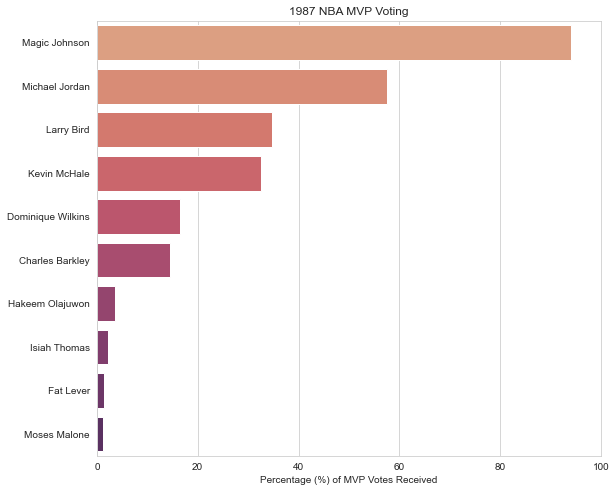

In [519]:
actual = df.loc[(df.Year_x == year) & (df.MVP_Share != 0),:]

actual.MVP_Share = actual.MVP_Share*100

sns.set_style('whitegrid')
plt.figure(figsize=(10,8),)
sns.barplot(x='MVP_Share',y='Player',data=actual.sort_values('MVP_Share',ascending=False).head(10),ci=False,palette=sns.color_palette("flare",10))
plt.ylabel('')
plt.xlabel('Percentage (%) of MVP Votes Received')
plt.title(f'{year} NBA MVP Voting')
plt.xlim(left=0,right=100)
plt.subplots_adjust(left=0.2, )

plt.savefig(f'/Users/chaseallbright/Downloads/{year}_MVP.png',dpi=400)

# fig.savefig('myimage.svg', format='svg', dpi=1200)
actual

In [520]:
results

,Player,Year,Pred_MVP
0,Mark Aguirre,1987,4.759
1,Charles Barkley,1987,29.116
2,Larry Bird,1987,74.581
3,Clyde Drexler,1987,5.91
4,Alex English,1987,3.117
5,Sleepy Floyd,1987,7.141
6,Magic Johnson,1987,59.776
7,Michael Jordan,1987,63.651
8,Moses Malone,1987,8.502
9,Kevin McHale,1987,22.631


In [521]:
actual.loc[:,['Player','Year_x','MVP_Share']]

,Player,Year_x,MVP_Share
2169,Mark Aguirre,1987,0.1
2179,Charles Barkley,1987,14.5
2186,Larry Bird,1987,34.7
2189,Rolando Blackman,1987,0.1
2247,Alex English,1987,0.3
2296,Magic Johnson,1987,94.0
2304,Michael Jordan,1987,57.6
2319,Fat Lever,1987,1.4
2329,Karl Malone,1987,0.4
2330,Moses Malone,1987,1.2


In [522]:
# Players who made both

[i for i in actual.Player if i in results.Player.tolist()]

['Mark Aguirre',
 'Charles Barkley',
 'Larry Bird',
 'Alex English',
 'Magic Johnson',
 'Michael Jordan',
 'Moses Malone',
 'Kevin McHale',
 'Hakeem Olajuwon',
 'Isiah Thomas',
 'Dominique Wilkins']

In [523]:
# Players who were predicted to make it but didn't

[i for i in results.Player if i not in actual.Player.tolist()]

['Clyde Drexler', 'Sleepy Floyd']

In [524]:
# Players who got votes but weren't predicted to.

[i for i in actual.Player if i not in results.Player.tolist()]

['Rolando Blackman', 'Fat Lever', 'Karl Malone', 'Robert Parish']

In [525]:
results.sort_values('Pred_MVP')

,Player,Year,Pred_MVP
11,Isiah Thomas,1987,0.702
4,Alex English,1987,3.117
0,Mark Aguirre,1987,4.759
3,Clyde Drexler,1987,5.91
5,Sleepy Floyd,1987,7.141
8,Moses Malone,1987,8.502
10,Hakeem Olajuwon,1987,13.165
9,Kevin McHale,1987,22.631
1,Charles Barkley,1987,29.116
12,Dominique Wilkins,1987,33.37


In [526]:
actual.sort_values('MVP_Share').loc[:,['Player','Year_x','MVP_Share']]

,Player,Year_x,MVP_Share
2169,Mark Aguirre,1987,0.1
2189,Rolando Blackman,1987,0.1
2247,Alex English,1987,0.3
2329,Karl Malone,1987,0.4
2373,Robert Parish,1987,0.4
2330,Moses Malone,1987,1.2
2319,Fat Lever,1987,1.4
2436,Isiah Thomas,1987,2.2
2369,Hakeem Olajuwon,1987,3.6
2179,Charles Barkley,1987,14.5
